In [1]:
import h5py, os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm

In [2]:
import sys; sys.path.append("../../offline/")
import sparse, geom, utils

In [4]:
path_to_data = "../../data/sparse/" # scratch/sparse on Maxwell
path_to_aux = "../../data/aux/" # scratch/benedikt/aux on Maxwell
path_to_geometry = "../../geometry/"

In [24]:
with h5py.File(path_to_aux + "goodpixels.h5", 'r') as f:
    goodpixels = f['data/data'][:]

In [80]:
run = 592
with sparse.Run(path_to_data + "r%04d.h5" %run) as r:
    cells = r.cellIds
    score = r.litpixel
goodcells = np.ones(len(cells), dtype=np.bool)
goodcells[cells == 0] = False
if run <= 577:
    goodcells[cells >= 142] = False

In [81]:
strong = np.argsort(score)[::-1]

In [82]:
with sparse.Frame(path_to_data + "r%04d.h5" %run, geometry=path_to_geometry + "b1.geom", goodmask=goodpixels) as f:
    img1 += np.float64(f.assembled(strong[0]))
    msk1 = (f.activepixels & f.goodpixels)

In [83]:
with sparse.Frame(path_to_data + "r%04d.h5" %run, geometry=path_to_geometry + "b2.geom", goodmask=goodpixels) as f:
    img2 += np.float64(f.assembled(strong[0]))
    msk2 = (f.activepixels & f.goodpixels)

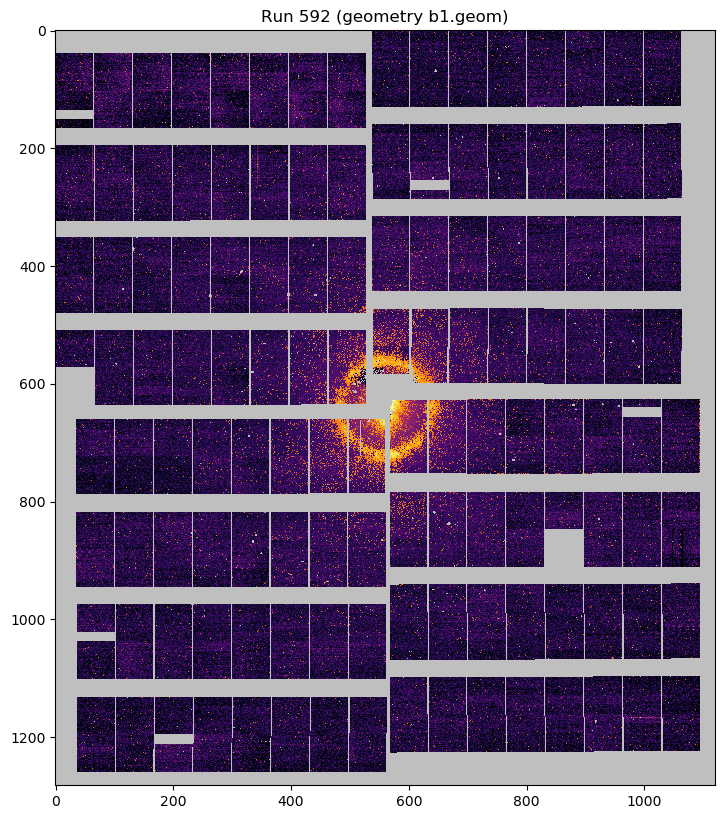

In [87]:
plt.figure(figsize=(10,10), dpi=100)
plt.title("Run %d (geometry b1.geom)" %(run))
cmap = cm.get_cmap('inferno')
cmap.set_bad('0.75')
cmap.set_under('0.0')
mimg = np.ma.masked_array(img1, mask=1-msk1)
mimg.data[mimg.data==0] = 1e-10
plt.imshow(mimg, norm=colors.LogNorm(vmin=1e-4, vmax=100), cmap=cmap)
plt.show()

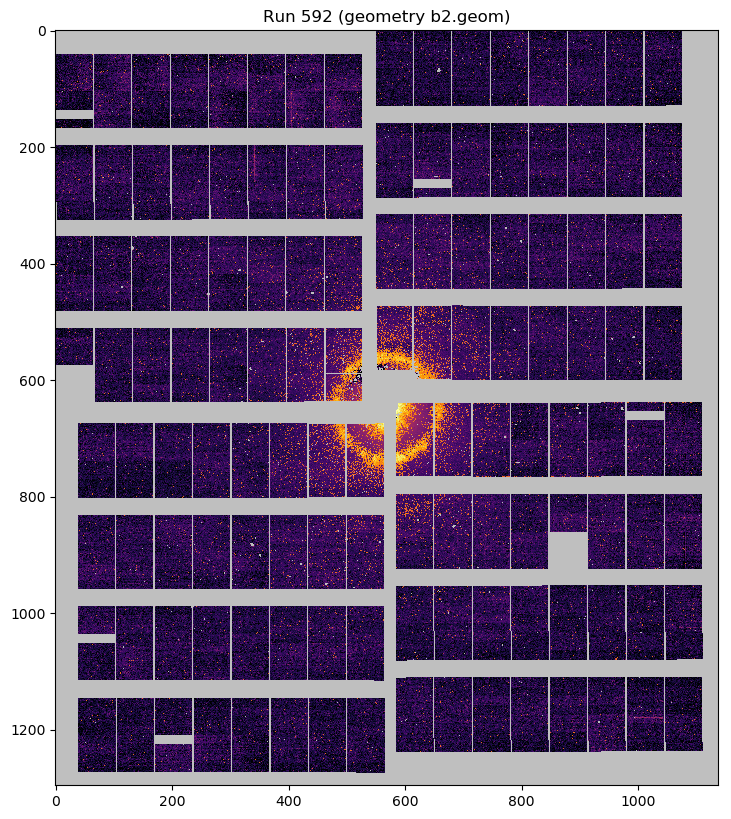

In [86]:
plt.figure(figsize=(10,10), dpi=100)
plt.title("Run %d (geometry b2.geom)" %(run))
cmap = cm.get_cmap('inferno')
cmap.set_bad('0.75')
cmap.set_under('0.0')
mimg = np.ma.masked_array(img2, mask=1-msk2)
mimg.data[mimg.data==0] = 1e-10
plt.imshow(mimg, norm=colors.LogNorm(vmin=1e-4, vmax=100), cmap=cmap)
plt.show()